# Opdracht 1.1: Complexiteit van sorteren

Er zijn diverse soorten sorteer-algoritmen. In deze opgave gaan we een aantal van deze algoritmen op hun run time efficiëntie vergelijken; eerst door het draaien van een paar tests, vervolgens door analyse van de code (complexiteitsanalyse).

In [1]:
from typing import List
from timeit import default_timer as timer
import seaborn as sns
import numpy as np
import random
import sys
sys.setrecursionlimit(30000)

In [2]:
randomlist1k  = list(np.random.randint(low=0, high=100, size=1000))
randomlist10k = list(np.random.randint(low=0, high=100, size=10000))
randomlist30k = list(np.random.randint(low=0, high=100, size=30000))

In [3]:
sortedlist30k = [i for i in range(30000)]

# Selection sort

Selection sort is een simpel, maar inefficient sorteeralgoritme. Als je een lijst probeert te sorteren in oplopende volgorde, moet het eerste element altijd het kleinste element zijn. In de eerste iteratie van selection sort selecteert het het kleinste element in de array en verwisselt deze met het eerste element van de array. De tweede iteratie selecteert het tweede kleinste item (deze is kleiner dan alle overige items in de array) en verwisselt deze met het tweede item van de array. Het algoritme gaat zo door tot het in de laatste iteratie het een-na-grootste element van de array met het item op de een-na-laatste plek van de array verwisselt.

https://en.wikipedia.org/wiki/Selection_sort

In [4]:
def selection_sort(data: List[int]) -> None:
    """Sort an array using selection sort"""
    # loop over len(data) -1 elements
    for index1 in range(len(data)-1):
        smallest = index1 # first index of remaining array

        # loop to find index of smallest element
        for index2 in range(index1 + 1, len(data)):
            if data[index2] < data[smallest]:
                smallest = index2

        # swap smallest element into position
        data[smallest], data[index1] = data[index1], data[smallest]


def recursive_selection_sort(data: List[int]) -> None:
    # Lists with less than one element are sorted
    if len(data) <= 1:
        return data
    else:
        smallest = min(data)    # find the smallest element in the list
        data.remove(smallest)   # remove from the list
        return [smallest] + recursive_selection_sort(data) # put on front of to be sorted remainder

# Insertion Sort
Insertion sort is een ander simpel, maar inefficient sorteeralgoritme. In de eerste iteratie van dit algoritme neemt het het tweede element van de array en verwisselt dit met het eerste element als het kleiner is dan het eerste element. In de tweede iteratie bekijkt het het derde element, en plaatst dit (insert) op de juiste plek tussen de eerste twee elementen. De eerste drie elementen zijn nu gesorteerd. Dit blijft het doen tot het alle overige elementen van de array heeft bekeken en op de juiste plek heeft gezet.

https://en.wikipedia.org/wiki/Insertion_sort

In [5]:
def insertion_sort(data: List[int]) -> None:
    """Sorting an array in place using insertion sort."""
    # loop over len(data) - 1 elements
    for next in range(1, len(data)):
        insert = data[next] # value to insert
        move_item = next    # location to place element

        # search for place to put current element
        while move_item > 0 and data[move_item - 1] > insert:
            # shift element right one slot
            data[move_item] = data[move_item - 1]
            move_item -= 1

        data[move_item] = insert # place inserted element


def recursive_insertion_sort(toSort: List[int], sorted: List[int] = []) -> List[int]:
    """Recursive implementation of insertion sort"""
    if len(toSort) == 0: # empty lists are sorted
        return sorted
    else:
        head, *tail = toSort
        sorted = recursive_insertion(head, sorted) # insert the head into the sorted list
        return recursive_insertion_sort(tail, sorted) # recursive call to sort the remainder


def recursive_insertion(element: int, data: List[int]) -> List[int]:
    """Assistant function to recursive insertion sort; recursively insert into a list"""
    if len(data) == 0: # if the list is empty, the element should be place there anyway
        return [element]
    else:
        head, *tail = data
        if element < head: # when the element is smaller than the head of the insertion list
            return [element, head] + tail # place it on the front
        else:
            return [head] + recursive_insertion(element, tail) # else, keep the head separate, and recursively insert into the tail

# Merge Sort
Merge sort is een efficient sorteeralgoritme, maar is conceptueel complexer om te begrijpen dan selection sort of insertion sort. Het merge sort algoritme sorteert door de array te splitsen in twee (ongeveer) evengrote subarrays. Het sorteert beide subarrays, en voegt ze dan samen in één grote array. De lastigheid zit natuurlijk in het samenvoegen.

In [6]:
 array1= [14,30,34,56,77]
 array2= [15,20,51,52,93]

In [7]:
def merge_sort(xs: List[int]) -> None:
    """In place merge sort of array without recursive. The basic idea
    is to avoid the recursive call while using iterative solution.
    The algorithm first merge chunk of length of 2, then merge chunks
    of length 4, then 8, 16, .... , until 2^k where 2^k is large than
    the length of the array
    """

    unit = 1
    while unit <= len(xs):
        h = 0
        for h in range(0, len(xs), unit * 2):
            l, r = h, min(len(xs), h + 2 * unit)
            mid = h + unit
            # merge xs[h:h + 2 * unit]
            p, q = l, mid
            while p < mid and q < r:
                # use <= for stable merge merge
                if xs[p] <= xs[q]:
                    p += 1
                else:
                    tmp = xs[q]
                    xs[p + 1: q + 1] = xs[p:q]
                    xs[p] = tmp
                    p, mid, q = p + 1, mid + 1, q + 1

        unit *= 2

In [8]:
def merge_arrays(array1: List[int], array2: List[int]) -> List[int]:
    """Recursively merge two arrays into one sorted array"""
    if len(array1) == len(array2) == 0: # done when both arrays are empty
        return []
    else:
        if len(array1) == 0: # if either array is empty
            head, *tail = array2
            return [head] + merge_arrays(array1, tail) # merge the remainder of the non-empty list
        elif len(array2) == 0: # idem for the other array
            head, *tail = array1
            return [head] + merge_arrays(tail, array2)
        else: # when both still have elements
            head1, *tail1 = array1
            head2, *tail2 = array2
            if head1 < head2: # select the smallest
                return [head1] + merge_arrays(tail1, array2) # and merge with the remainder
            else:
                return [head2] + merge_arrays(array1, tail2) # idem for when array 2 had the smaller element


def recursive_merge_sort(data: List[int]) -> List[int]:
    """Recursive merge sort implementation for sorting arrays"""
    if len(data) == 1: # arrays with 1 element are sorted
        return data
    else:
        middle = int(len(data)/2) # find the middle (round down if len(data) is odd)
        first, second = data[:middle], data[middle:] # split the list in half
        return merge_arrays(recursive_merge_sort(first), recursive_merge_sort(second)) # merge_sort both arrays, and merge them into the result

# Opdrachten
1. a. Maak een tabel met de meetwaarden van de volgende tests (schrijf de benodigde code om deze tests uit te kunnen voeren):
     Genereer random lijsten van lengtes 1'000, 10'000 en 30'000 items. Hoe lang heeft elk algoritme nodig om deze te sorteren?

    b. Genereer een (gesorteerde) lijst van 30'000 items. Hoe lang heeft elk algoritme nodig om deze te sorteren?

    c. Draai de gesorteerde lijst van 30'000 items van de vorige vraag achterstevoren (list.reverse()). Hoe lang heeft elk algoritme nodig om deze te sorteren?


# A

In [9]:
print(randomlist1k[:10], len(randomlist1k))
print(randomlist10k[:10], len(randomlist10k))
print(randomlist30k[:10], len(randomlist30k))

[71, 90, 24, 98, 80, 32, 54, 39, 41, 20] 1000
[77, 22, 24, 43, 42, 45, 13, 19, 36, 89] 10000
[59, 84, 27, 45, 89, 59, 14, 49, 13, 25] 30000


In [10]:
start = timer()
selection_sort(randomlist1k.copy())
elapsed_time_selection_sort1k = timer() - start

start = timer()
insertion_sort(randomlist1k.copy())
elapsed_time_insertion_sort1k = timer() - start

start = timer()
merge_sort(randomlist1k.copy())
elapsed_time_merge_sort1k = timer() - start

In [11]:
start = timer()
selection_sort(randomlist10k.copy())
elapsed_time_selection_sort10k = timer() - start

start = timer()
insertion_sort(randomlist10k.copy())
elapsed_time_insertion_sort10k = timer() - start

start = timer()
merge_sort(randomlist10k.copy())
elapsed_time_merge_sort10k = timer() - start

In [12]:
start = timer()
selection_sort(randomlist30k.copy())
elapsed_time_selection_sort30k = timer() - start

start = timer()
insertion_sort(randomlist30k.copy())
elapsed_time_insertion_sort30k = timer() - start

start = timer()
merge_sort(randomlist30k.copy())
elapsed_time_merge_sort30k = timer() - start

In [13]:
algcomp = {'selection_sort times': [elapsed_time_selection_sort1k, elapsed_time_selection_sort10k, elapsed_time_selection_sort30k],
            'insertion_sort times':[elapsed_time_insertion_sort1k,elapsed_time_insertion_sort10k ,elapsed_time_insertion_sort30k],
            'merge_sort times' : [elapsed_time_merge_sort1k    ,elapsed_time_merge_sort10k     ,elapsed_time_merge_sort30k]}

<AxesSubplot:>

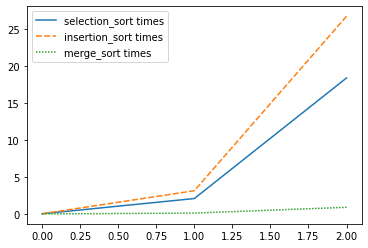

In [14]:
sns.lineplot(data = algcomp)

In [15]:
print('selection_sort(randomlist1k)', elapsed_time_selection_sort1k)
print('insertion_sort(randomlist1k)', elapsed_time_insertion_sort1k)
print('merge_sort(randomlist1k)', elapsed_time_merge_sort1k)
print()
print('selection_sort(randomlist10k)', elapsed_time_selection_sort10k)
print('insertion_sort(randomlist10k)', elapsed_time_insertion_sort10k)
print('merge_sort(randomlist10k)', elapsed_time_merge_sort10k)
print()
print('selection_sort(randomlist30k)', elapsed_time_selection_sort30k)
print('insertion_sort(randomlist30k)', elapsed_time_insertion_sort30k)
print('merge_sort(randomlist30k)', elapsed_time_merge_sort30k)

selection_sort(randomlist1k) 0.02234819999999993
insertion_sort(randomlist1k) 0.027418300000000118
merge_sort(randomlist1k) 0.003014199999999967

selection_sort(randomlist10k) 2.0854848
insertion_sort(randomlist10k) 3.1461927
merge_sort(randomlist10k) 0.11348229999999937

selection_sort(randomlist30k) 18.418281
insertion_sort(randomlist30k) 26.775124400000003
merge_sort(randomlist30k) 0.8997758000000005


# B

In [16]:

print(sortedlist30k[:10], len(sortedlist30k))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 30000


In [17]:
start = timer()
selection_sort(sortedlist30k.copy())
elapsed_time_selection_sort30k_sorted = timer() - start

start = timer()
insertion_sort(sortedlist30k.copy())
elapsed_time_insertion_sort30k_sorted = timer() - start

start = timer()
merge_sort(sortedlist30k.copy())
elapsed_time_merge_sort30k_sorted = timer() - start

In [18]:
print('selection_sort(randomlist30k)', elapsed_time_selection_sort30k_sorted)
print('insertion_sort(randomlist30k)', elapsed_time_insertion_sort30k_sorted)
print('merge_sort(randomlist30k)', elapsed_time_merge_sort30k_sorted)

selection_sort(randomlist30k) 16.418602500000006
insertion_sort(randomlist30k) 0.0028618000000051325
merge_sort(randomlist30k) 0.023134799999994016


# C

In [19]:
reversed_sortedlist = sortedlist30k[::-1]

In [20]:
print(reversed_sortedlist[:10], len(reversed_sortedlist))

[29999, 29998, 29997, 29996, 29995, 29994, 29993, 29992, 29991, 29990] 30000


In [21]:
start = timer()
selection_sort(reversed_sortedlist.copy())
elapsed_time_selection_sort30k_sorted_rev = timer() - start

start = timer()
insertion_sort(reversed_sortedlist.copy())
elapsed_time_insertion_sort30k_sorted_rev = timer() - start

start = timer()
merge_sort(reversed_sortedlist.copy())
elapsed_time_merge_sort30k_sorted_rev = timer() - start

In [22]:
print('selection_sort(randomlist30k)', elapsed_time_selection_sort30k_sorted_rev)
print('insertion_sort(randomlist30k)', elapsed_time_insertion_sort30k_sorted_rev)
print('merge_sort(randomlist30k)', elapsed_time_merge_sort30k_sorted_rev)

selection_sort(randomlist30k) 17.444159299999995
insertion_sort(randomlist30k) 55.687974800000006
merge_sort(randomlist30k) 1.303888900000004


# 2
Bekijk / bepaal aan de hand van de algoritmes (en beschrijvingen) hierboven, wat de theoretische run time efficiëntie (Big O) van elk van deze algoritmes is. Bepaal hiervoor 'best case', 'worst case' en 'average case' run time efficiëntie.


###### selection_sort

https://en.wikipedia.org/wiki/Selection_sort

best case

$\mathcal{O}(n ^{2})$

worst case

$\mathcal{O}(n ^{2})$

average case

$\mathcal{O}(n ^{2})$

###### insertion_sort

best case

$\mathcal{O}(n)$

worst case

$\mathcal{O}(n ^{2})$

average case

$\mathcal{O}(n ^{2})$

###### merge_sort

https://en.wikipedia.org/wiki/Merge_sort

best case

$\mathcal{O}(n\log{}n)$

worst case

$\mathcal{O}(n\log{}n)$

average case

$\mathcal{O}(n\log{}n)$

# 3
Maakt het voor de complexiteit (Big O) van een algoritme uit of je een iteratieve of een recursieve versie beschouwd?